# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#sklearn
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

#sktime
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.forecasting.model_selection import ExpandingWindowSplitter

#import functions from the functions notebook
%run functions.ipynb
import import_ipynb
import functions

In [2]:
#retrieve data
contributions = retrieve_contributions()


In [3]:
#change index to DateTime
contributions.index = pd.to_datetime(contributions.index)
#Check that the index is a DateTime object
isinstance(contributions.index, pd.DatetimeIndex)

True

In [4]:
contributions.head(2)

,political_party_of_recipient,year,monetary_amount,non_monetary_amount,total_contribution
fiscal/election_date,,,,,
1993-10-25,conservative,1993,5000.0,0.0,5000.0
1993-10-25,conservative,1993,100.0,0.0,100.0


In [5]:
contributions.tail(2)

,political_party_of_recipient,year,monetary_amount,non_monetary_amount,total_contribution
fiscal/election_date,,,,,
2024-03-04,liberal,2024,0.0,0.0,0.0
2024-03-04,liberal,2024,10.0,0.0,10.0


In [6]:
party_list = ['liberal', 'conservative', 'ndp', 'bloc_québécois']


# Baseline Model

In [7]:
#create list of election years
election_years = [1993,1997,2000, 2004, 2006, 2008, 2011, 2015, 2019, 2021]

## Liberal

In [8]:
party = 'liberal'

#get train test split for 4 years
X_train, y_train, X_test, y_test = get_tts(data = contributions, 
        election_years = election_years, 
       party = party,
       train_end = 2019, 
       test_end = 2023,
       lags = 5)

In [9]:
#instantiate naive forecaster, fit and get predictions
liberal_base_model = NaiveForecaster(strategy = 'mean')
liberal_base_model.fit(y_train)
liberal_base_preds = liberal_base_model.predict(y_test.index)

C:\Users\wtlem\anaconda3\envs\sktime_env\Lib\site-packages\gluonts\json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


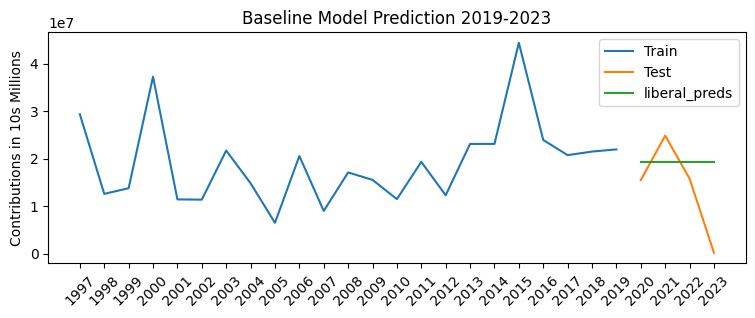

In [10]:
#plot baseline forecast
plt.figure(figsize = (9, 3))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(y_test.index, liberal_base_preds, label = 'liberal_preds')
plt.title('Baseline Model Prediction 2019-2023')
plt.ylabel('Contributions in 10''s Millions')
plt.xticks(range(1997, 2024), rotation = 45)
plt.legend();

In [11]:
#get base metrics
liberal_base_rmse = round(root_mean_squared_error(y_test, liberal_base_preds),0)
liberal_base_mae = round(mean_absolute_error(y_test, liberal_base_preds),0)
liberal_mean = round(pd.concat([y_test, y_train]).mean(), 0)

In [12]:
#display base metrics 
print(f'Liberal Baseline Model')
print(f'RMSE: {liberal_base_rmse}')
print(f'MAE: {liberal_base_mae}')

Liberal Baseline Model
RMSE: 10271735.0
MAE: 7979432.0


## Conservative 

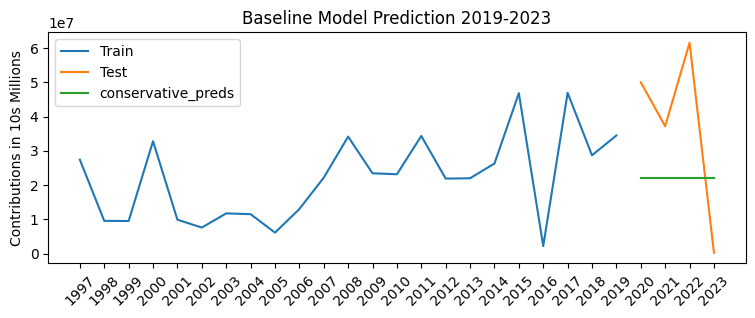

In [13]:
party = 'conservative'

#get train test split for 4 years
X_train, y_train, X_test, y_test = get_tts(data = contributions, 
        election_years = election_years, 
       party = party,
       train_end = 2019, 
       test_end = 2023,
       lags = 5)

#instantiate naive forecaster, fit and get predictions
conservative_base_model = NaiveForecaster(strategy = 'mean')
conservative_base_model.fit(y_train)
conservative_base_preds = conservative_base_model.predict(y_test.index)

#plot baseline forecast
plt.figure(figsize = (9, 3))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(y_test.index, conservative_base_preds, label = 'conservative_preds')
plt.title('Baseline Model Prediction 2019-2023')
plt.ylabel('Contributions in 10''s Millions')
plt.xticks(range(1997, 2024), rotation = 45)
plt.legend();

In [14]:
#get base metrics
conservative_base_rmse = round(root_mean_squared_error(y_test, conservative_base_preds),0)
conservative_base_mae = round(mean_absolute_error(y_test, conservative_base_preds),0)
conservative_mean = round(pd.concat([y_test, y_train]).mean(), 0)

#display base metrics 
print(f'Liberal Baseline Model')
print(f'RMSE: {conservative_base_rmse}')
print(f'MAE: {conservative_base_mae}')

Liberal Baseline Model
RMSE: 27658120.0
MAE: 26156665.0


## NDP

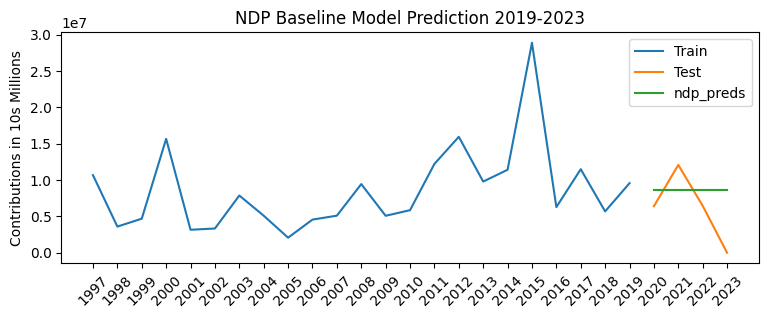

In [15]:
party = 'ndp'

#get train test split for 4 years
X_train, y_train, X_test, y_test = get_tts(data = contributions, 
        election_years = election_years, 
       party = party,
       train_end = 2019, 
       test_end = 2023,
       lags = 5)

#instantiate naive forecaster, fit and get predictions
ndp_base_model = NaiveForecaster(strategy = 'mean')
ndp_base_model.fit(y_train)
ndp_base_preds = ndp_base_model.predict(y_test.index)

#plot baseline forecast
plt.figure(figsize = (9, 3))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(y_test.index, ndp_base_preds, label = 'ndp_preds')
plt.title('NDP Baseline Model Prediction 2019-2023')
plt.ylabel('Contributions in 10''s Millions')
plt.xticks(range(1997, 2024), rotation = 45)
plt.legend();

In [16]:
#get base metrics
ndp_base_rmse = round(root_mean_squared_error(y_test, ndp_base_preds),0)
ndp_base_mae = round(mean_absolute_error(y_test, ndp_base_preds),0)
ndp_mean = round(pd.concat([y_test, y_train]).mean(), 0)

#display base metrics 
print(f'NDP Baseline Model')
print(f'RMSE: {ndp_base_rmse}')
print(f'MAE: {ndp_base_mae}')

NDP Baseline Model
RMSE: 4883017.0
MAE: 4101601.0


## Bloc Québécois

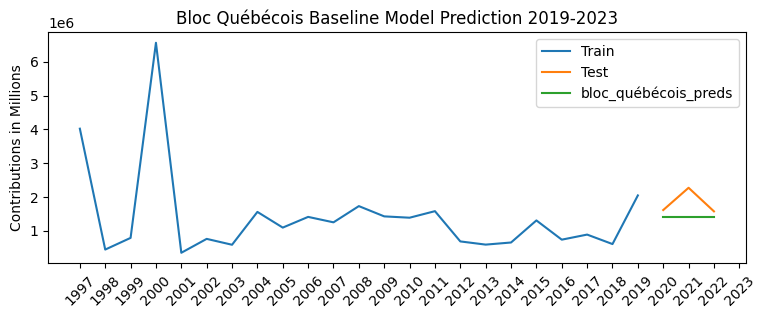

In [17]:
party = 'bloc_québécois'

#get train test split for 4 years
X_train, y_train, X_test, y_test = get_tts(data = contributions, 
        election_years = election_years, 
       party = party,
       train_end = 2019, 
       test_end = 2023,
       lags = 5)

#instantiate naive forecaster, fit and get predictions
bloc_québécois_base_model = NaiveForecaster(strategy = 'mean')
bloc_québécois_base_model.fit(y_train)
bloc_québécois_base_preds = bloc_québécois_base_model.predict(y_test.index)

#plot baseline forecast
plt.figure(figsize = (9, 3))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(y_test.index, bloc_québécois_base_preds, label = 'bloc_québécois_preds')
plt.title('Bloc Québécois Baseline Model Prediction 2019-2023')
plt.ylabel('Contributions in Millions')
plt.xticks(range(1997, 2024), rotation = 45)
plt.legend();

In [18]:
#get base metrics
bloc_québécois_base_rmse = round(root_mean_squared_error(y_test, bloc_québécois_base_preds),0)
bloc_québécois_base_mae = round(mean_absolute_error(y_test, bloc_québécois_base_preds),0)
bloc_québécois_mean = round(pd.concat([y_test, y_train]).mean(), 0)

#display base metrics 
print(f'Bloc Québécois Baseline Model')
print(f'RMSE: {bloc_québécois_base_rmse}')
print(f'MAE: {bloc_québécois_base_mae}')

Bloc Québécois Baseline Model
RMSE: 518645.0
MAE: 408259.0


# Linear Model

In [19]:
#create a dataframe to store modeling results
model_res = pd.DataFrame()

## Liberal(l1)

In [20]:
X_train, y_train, X_test, y_test = get_tts(data = contributions, 
        election_years = election_years, 
       party = 'liberal',
       train_end = 2019, 
       test_end = 2023,
       lags = 5)

model_res = pd.concat([model_res, 
                       lr_results(X_train, y_train, X_test, y_test,
                                  input_df = model_res,
                                  party = 'liberal',
                                 model_name = 'L1')]
                                    )
#get predictions 
l1_preds = extract_preds(model_res, 'L1')

model_res.drop(columns = 'preds')

,model_name,model,party,scaler,rmse,mae
0,L1,lr,liberal,None,5941013.0,3911651.0


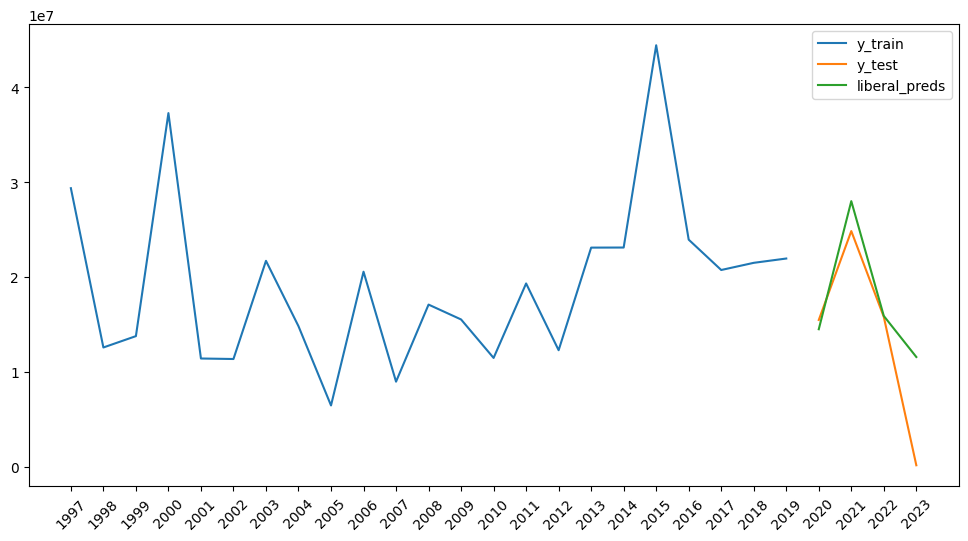

In [21]:
plt.figure(figsize = (12, 6))
plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_test.index, l1_preds, label = 'liberal_preds')
plt.xticks(range(1997, 2024), rotation = 45)
plt.legend();

## Liberal Scaled(L2)

The above model does not fit well for the upper and lower ends so I will experiment with scaling the y variables to see if that improves prediction. 

In [22]:
X_train, y_train, X_test, y_test = get_tts(data = contributions, 
        election_years = election_years, 
       party = 'liberal',
       scaler = 'log',                                    
       train_end = 2019, 
       test_end = 2023,
       lags = 5)

In [23]:
model_res = pd.concat([model_res, 
                       lr_results(X_train, y_train, X_test, y_test,
                                  input_df = model_res,
                                  party = 'liberal',
                                 scaler = 'log',
                                 model_name = 'L2')]
                            )
#get predictions 
l2_preds = extract_preds(model_res, 'L2')

model_res.drop(columns = 'preds')

,model_name,model,party,scaler,rmse,mae
0,L1,lr,liberal,None,5941013.0,3911651.0
0,L2,lr,liberal,log,6547936.0,4090028.0


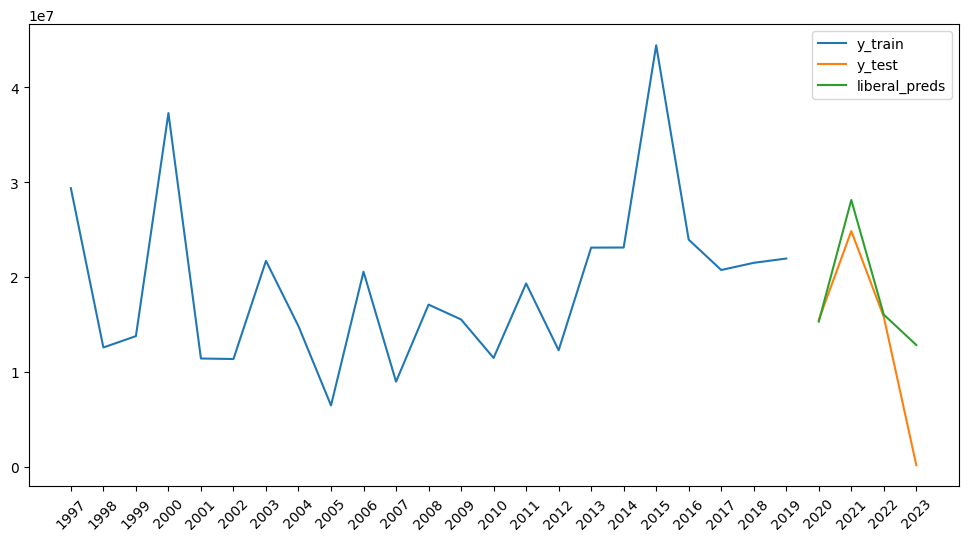

In [24]:
plt.figure(figsize = (12, 6))
plt.plot(np.exp(y_train), label = 'y_train')
plt.plot(np.exp(y_test), label = 'y_test')
plt.plot(y_test.index, l2_preds, label = 'liberal_preds')
plt.xticks(range(1997, 2024), rotation = 45)
plt.legend();

## Conservative(C1)

In [25]:
X_train, y_train, X_test, y_test = get_tts(data = contributions, 
        election_years = election_years, 
       party = 'conservative',
       train_end = 2019, 
       test_end = 2023,
       lags = 5)

model_res = pd.concat([model_res, 
                       lr_results(X_train, y_train, X_test, y_test, 
                                  input_df = model_res, 
                                  party = 'conservative',
                                 model_name = 'C1')]
                                    )
c1_preds = extract_preds(model_res, 'C1')
model_res.drop(columns = 'preds')

,model_name,model,party,scaler,rmse,mae
0,L1,lr,liberal,None,5941013.0,3911651.0
0,L2,lr,liberal,log,6547936.0,4090028.0
0,C1,lr,conservative,None,24354536.0,21323675.0


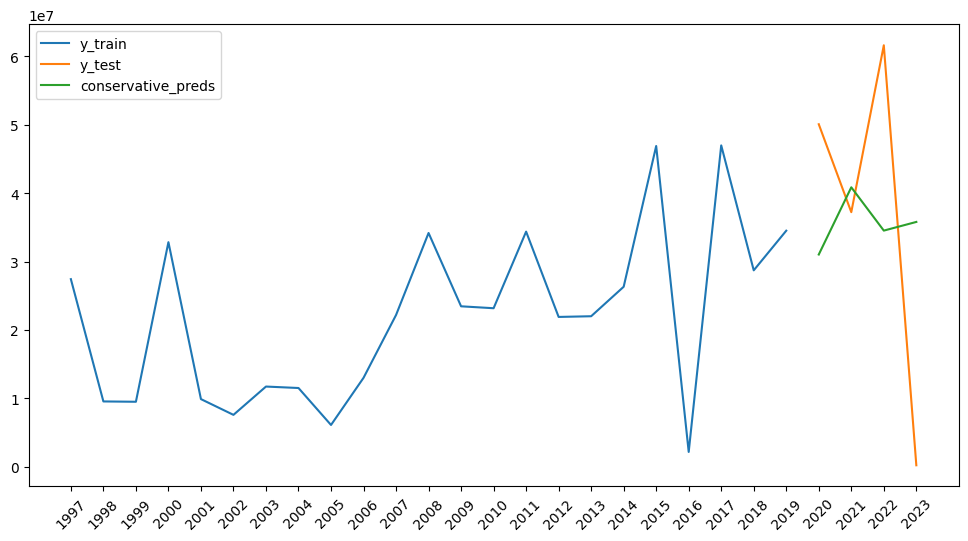

In [26]:
plt.figure(figsize = (12, 6))
plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_test.index, c1_preds, label = 'conservative_preds')
plt.xticks(range(1997, 2024), rotation = 45)
plt.legend();

## Scaled Conservative(C2)

In [27]:
X_train, y_train, X_test, y_test = get_tts(data = contributions, 
        election_years = election_years, 
       party = 'conservative',
       train_end = 2019, 
       test_end = 2023,
       lags = 5,
        scaler = 'log')

model_res = pd.concat([model_res, 
                       lr_results(X_train, y_train, X_test, y_test, 
                                  input_df = model_res, 
                                  party = 'conservative',
                                 model_name = 'C2',
                                 scaler = 'log')]
                                    )
c2_preds = extract_preds(model_res, 'C2')
model_res.drop(columns = 'preds')

,model_name,model,party,scaler,rmse,mae
0,L1,lr,liberal,None,5941013.0,3911651.0
0,L2,lr,liberal,log,6547936.0,4090028.0
0,C1,lr,conservative,None,24354536.0,21323675.0
0,C2,lr,conservative,log,29611724.0,24809677.0


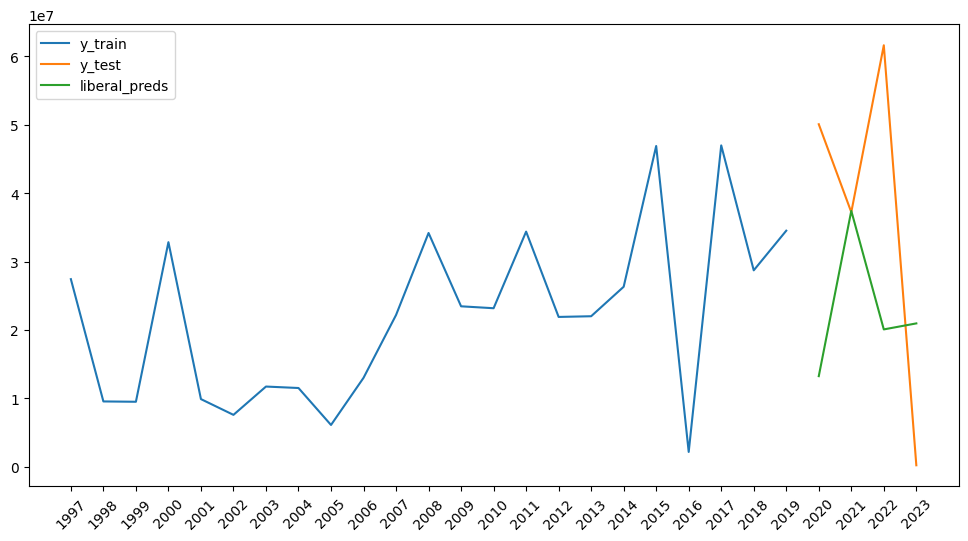

In [28]:
plt.figure(figsize = (12, 6))
plt.plot(np.exp(y_train), label = 'y_train')
plt.plot(np.exp(y_test), label = 'y_test')
plt.plot(y_test.index, c2_preds, label = 'liberal_preds')
plt.xticks(range(1997, 2024), rotation = 45)
plt.legend();

## NDP(N1)

In [29]:
X_train, y_train, X_test, y_test = get_tts(data = contributions, 
        election_years = election_years, 
       party = 'ndp',
       train_end = 2019, 
       test_end = 2023,
       lags = 5)

model_res = pd.concat([model_res, 
                       lr_results(X_train, y_train, X_test, y_test, 
                                  input_df = model_res, 
                                  party = 'ndp',
                                 model_name = 'N1')]
                                    )
n1_preds = extract_preds(model_res, 'N1')
model_res.drop(columns = 'preds')

,model_name,model,party,scaler,rmse,mae
0,L1,lr,liberal,None,5941013.0,3911651.0
0,L2,lr,liberal,log,6547936.0,4090028.0
0,C1,lr,conservative,None,24354536.0,21323675.0
0,C2,lr,conservative,log,29611724.0,24809677.0
0,N1,lr,ndp,None,2885209.0,1795680.0


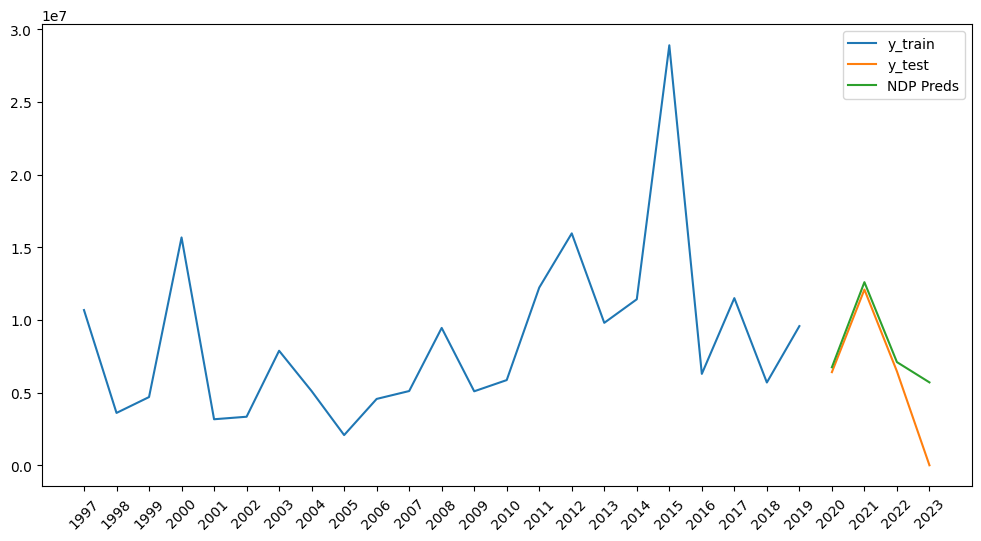

In [30]:
plt.figure(figsize = (12, 6))
plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_test.index, n1_preds, label = 'NDP Preds')
plt.xticks(range(1997, 2024), rotation = 45)
plt.legend();

## Scaled NDP(N2

In [31]:
X_train, y_train, X_test, y_test = get_tts(data = contributions, 
        election_years = election_years, 
       party = 'ndp',
       train_end = 2019, 
       test_end = 2023,
       lags = 5,
        scaler = 'log')

model_res = pd.concat([model_res, 
                       lr_results(X_train, y_train, X_test, y_test, 
                                  input_df = model_res, 
                                  party = 'ndp',
                                 model_name = 'N2',
                                 scaler = 'log')]
                                    )
n2_preds = extract_preds(model_res, 'N2')
model_res.drop(columns = 'preds')

,model_name,model,party,scaler,rmse,mae
0,L1,lr,liberal,None,5941013.0,3911651.0
0,L2,lr,liberal,log,6547936.0,4090028.0
0,C1,lr,conservative,None,24354536.0,21323675.0
0,C2,lr,conservative,log,29611724.0,24809677.0
0,N1,lr,ndp,None,2885209.0,1795680.0
0,N2,lr,ndp,log,3045706.0,1921515.0


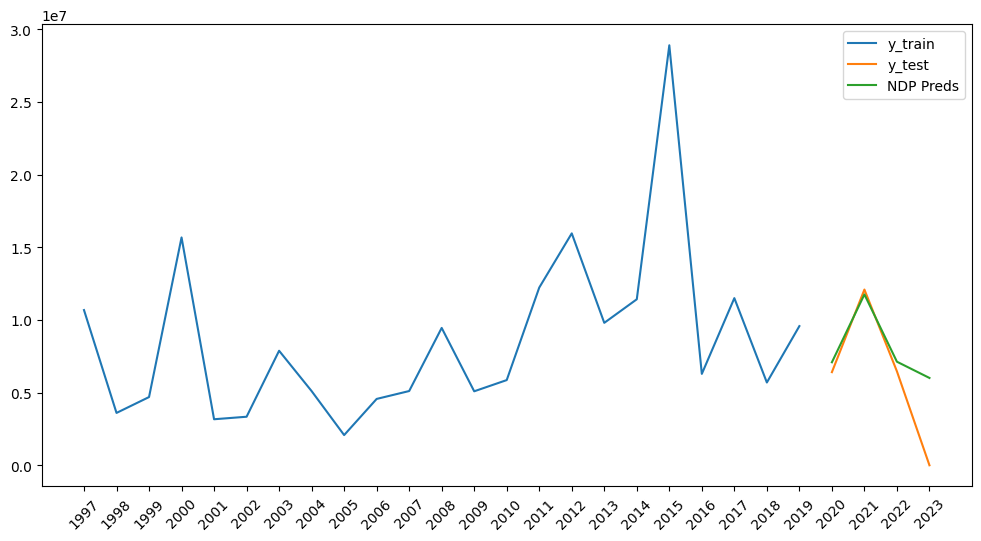

In [32]:
plt.figure(figsize = (12, 6))
plt.plot(np.exp(y_train), label = 'y_train')
plt.plot(np.exp(y_test), label = 'y_test')
plt.plot(y_test.index, n2_preds, label = 'NDP Preds')
plt.xticks(range(1997, 2024), rotation = 45)
plt.legend();

## Bloc(B1)

In [33]:
X_train, y_train, X_test, y_test = get_tts(data = contributions, 
        election_years = election_years, 
       party = 'bloc_québécois',
       train_end = 2019, 
       test_end = 2023,
       lags = 5)

model_res = pd.concat([model_res, 
                       lr_results(X_train, y_train, X_test, y_test, 
                                  input_df = model_res, 
                                  party = 'bloc_québécois',
                                 model_name = 'B1')]
                                    )
b1_preds = extract_preds(model_res, 'B1')
model_res.drop(columns = 'preds')

,model_name,model,party,scaler,rmse,mae
0,L1,lr,liberal,None,5941013.0,3911651.0
0,L2,lr,liberal,log,6547936.0,4090028.0
0,C1,lr,conservative,None,24354536.0,21323675.0
0,C2,lr,conservative,log,29611724.0,24809677.0
0,N1,lr,ndp,None,2885209.0,1795680.0
0,N2,lr,ndp,log,3045706.0,1921515.0
0,B1,lr,bloc_québécois,None,969905.0,894225.0


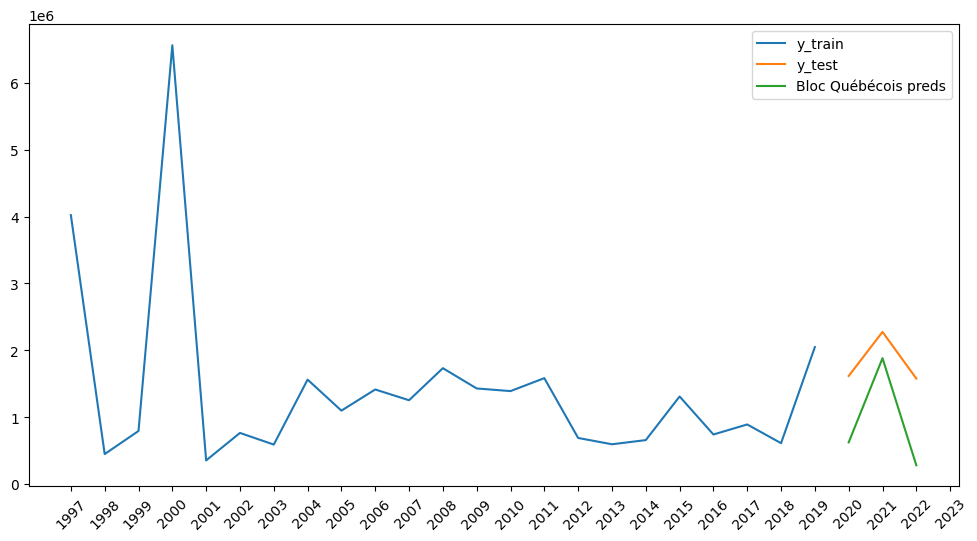

In [34]:
plt.figure(figsize = (12, 6))
plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_test.index, b1_preds, label = 'Bloc Québécois preds')
plt.xticks(range(1997, 2024), rotation = 45)
plt.legend();

## Bloc Scaled(B2)

In [35]:
X_train, y_train, X_test, y_test = get_tts(data = contributions, 
        election_years = election_years, 
       party = 'bloc_québécois',
       train_end = 2019, 
       test_end = 2023,
       lags = 5,
        scaler = 'log')

model_res = pd.concat([model_res, 
                       lr_results(X_train, y_train, X_test, y_test, 
                                  input_df = model_res, 
                                  party = 'bloc_québécois',
                                 model_name = 'B2',
                                 scaler = 'log')]
                                    )
b2_preds = extract_preds(model_res, 'B2')
model_res.drop(columns = 'preds')

,model_name,model,party,scaler,rmse,mae
0,L1,lr,liberal,None,5941013.0,3911651.0
0,L2,lr,liberal,log,6547936.0,4090028.0
0,C1,lr,conservative,None,24354536.0,21323675.0
0,C2,lr,conservative,log,29611724.0,24809677.0
0,N1,lr,ndp,None,2885209.0,1795680.0
0,N2,lr,ndp,log,3045706.0,1921515.0
0,B1,lr,bloc_québécois,None,969905.0,894225.0
0,B2,lr,bloc_québécois,log,641509.0,550668.0


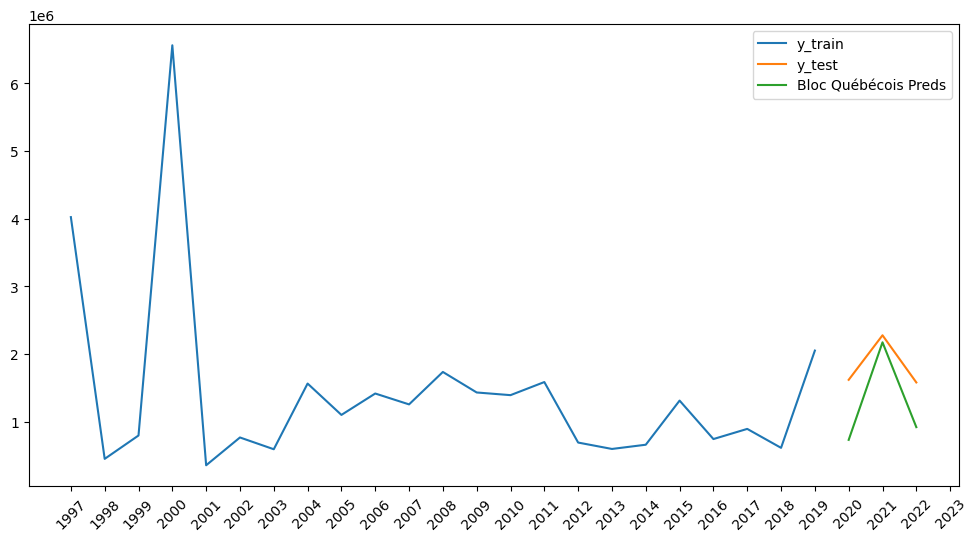

In [36]:
plt.figure(figsize = (12, 6))
plt.plot(np.exp(y_train), label = 'y_train')
plt.plot(np.exp(y_test), label = 'y_test')
plt.plot(y_test.index, b2_preds, label = 'Bloc Québécois Preds')
plt.xticks(range(1997, 2024), rotation = 45)
plt.legend();

# ARIMA Models

## Liberal(L3)

In [37]:
party = 'liberal'
model_name = 'L3'

#liberal Train test Split 
X_train, y_train, X_test, y_test = get_tts(data = contributions, 
        election_years = election_years, 
       party = party,
       train_end = 2019, 
       test_end = 2023,
       lags = 0)

In [38]:

model_res = pd.concat([model_res, 
                       arima_results(X_train, y_train, X_test, y_test, 
                                     party = party, 
                                     fh = [1,2,3,4], 
                                     model_name = model_name,
                                    param_grid =  
                                     {'order': [#(1,0,0), (5,0,0), (7,0,0),
                                    (1,1,0),(3,1,0),(5,1,0),
                                    (1,1,1), (3,1,1), (5,1,1), (7,1,1)
                                               ],
                                      
                                    'trend': [None, "t","ct"]}
                                     )])
l3_preds = extract_preds(model_res, model_name)
model_res.drop(columns = 'preds')

C:\Users\wtlem\anaconda3\envs\sktime_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\wtlem\anaconda3\envs\sktime_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\wtlem\anaconda3\envs\sktime_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\wtlem\anaconda3\envs\sktime_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: Va

,model_name,model,party,scaler,rmse,mae
0,L1,lr,liberal,None,5941013.0,3911651.0
0,L2,lr,liberal,log,6547936.0,4090028.0
0,C1,lr,conservative,None,24354536.0,21323675.0
0,C2,lr,conservative,log,29611724.0,24809677.0
0,N1,lr,ndp,None,2885209.0,1795680.0
0,N2,lr,ndp,log,3045706.0,1921515.0
0,B1,lr,bloc_québécois,None,969905.0,894225.0
0,B2,lr,bloc_québécois,log,641509.0,550668.0
0,L3,lr,liberal,NaN,8159013.0,5840371.0


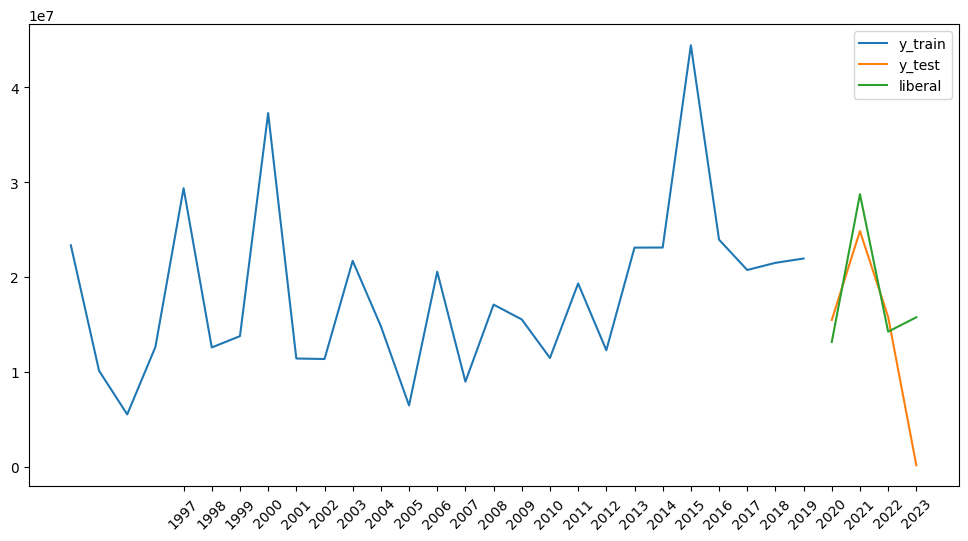

In [39]:
plt.figure(figsize = (12, 6))
plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_test.index, l3_preds, label = party)
plt.xticks(range(1997, 2024), rotation = 45)
plt.legend();

## Conservative(C3)

In [40]:
party = 'conservative'
model_name = 'C3'

#Train test Split 
X_train, y_train, X_test, y_test = get_tts(data = contributions, 
        election_years = election_years, 
       party = party,
       train_end = 2019, 
       test_end = 2023,
       lags = 0)

In [41]:

model_res = pd.concat([model_res, 
                       arima_results(X_train, y_train, X_test, y_test, 
                                     party = party, 
                                     fh = [1,2,3,4], 
                                     model_name = model_name,
                                    param_grid =  
                                     {'order': [#(1,0,0), (5,0,0), (7,0,0),
                                    (1,1,0),(3,1,0),(5,1,0),
                                    (1,1,1), (3,1,1), (5,1,1), (7,1,1)],
                                      
                                    'trend': [None, "t","ct"]}
                                     )])
c3_preds = extract_preds(model_res, model_name)
model_res.drop(columns = 'preds')

C:\Users\wtlem\anaconda3\envs\sktime_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\wtlem\anaconda3\envs\sktime_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\wtlem\anaconda3\envs\sktime_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\wtlem\anaconda3\envs\sktime_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: Va

,model_name,model,party,scaler,rmse,mae
0,L1,lr,liberal,None,5941013.0,3911651.0
0,L2,lr,liberal,log,6547936.0,4090028.0
0,C1,lr,conservative,None,24354536.0,21323675.0
0,C2,lr,conservative,log,29611724.0,24809677.0
0,N1,lr,ndp,None,2885209.0,1795680.0
0,N2,lr,ndp,log,3045706.0,1921515.0
0,B1,lr,bloc_québécois,None,969905.0,894225.0
0,B2,lr,bloc_québécois,log,641509.0,550668.0
0,L3,lr,liberal,NaN,8159013.0,5840371.0
0,C3,lr,conservative,NaN,24061564.0,21166809.0


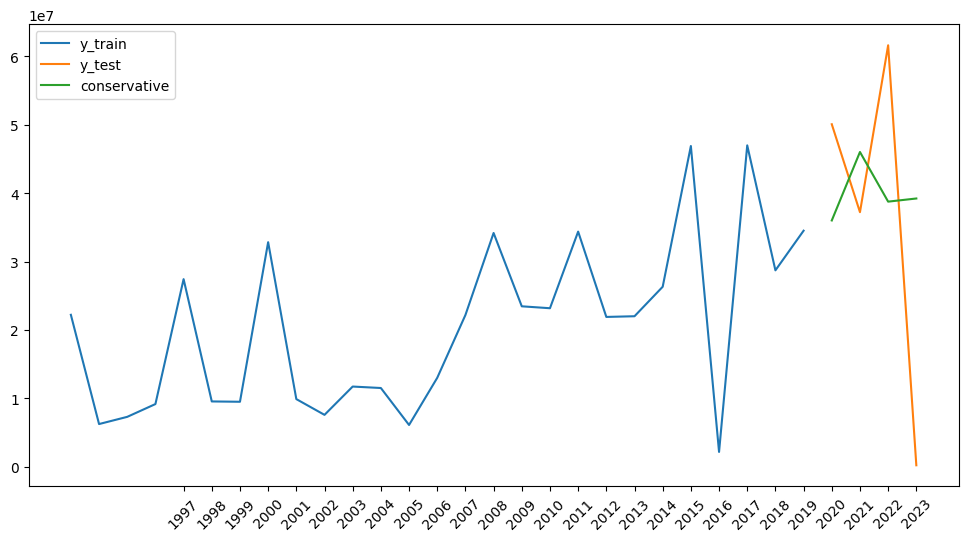

In [42]:
plt.figure(figsize = (12, 6))
plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_test.index, c3_preds, label = party)
plt.xticks(range(1997, 2024), rotation = 45)
plt.legend();

## NDP(N3)

In [43]:
party = 'ndp'
model_name = 'N3'

#Train test Split 
X_train, y_train, X_test, y_test = get_tts(data = contributions, 
        election_years = election_years, 
       party = party,
       train_end = 2019, 
       test_end = 2023,
       lags = 0)

In [44]:

model_res = pd.concat([model_res, 
                       arima_results(X_train, y_train, X_test, y_test, 
                                     party = party, 
                                     fh = [1,2,3,4], 
                                     model_name = model_name)]
                                    )
n3_preds = extract_preds(model_res, model_name)
model_res.drop(columns = 'preds')

C:\Users\wtlem\anaconda3\envs\sktime_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\wtlem\anaconda3\envs\sktime_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\wtlem\anaconda3\envs\sktime_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\wtlem\anaconda3\envs\sktime_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: Va

,model_name,model,party,scaler,rmse,mae
0,L1,lr,liberal,None,5941013.0,3911651.0
0,L2,lr,liberal,log,6547936.0,4090028.0
0,C1,lr,conservative,None,24354536.0,21323675.0
0,C2,lr,conservative,log,29611724.0,24809677.0
0,N1,lr,ndp,None,2885209.0,1795680.0
0,N2,lr,ndp,log,3045706.0,1921515.0
0,B1,lr,bloc_québécois,None,969905.0,894225.0
0,B2,lr,bloc_québécois,log,641509.0,550668.0
0,L3,lr,liberal,NaN,8159013.0,5840371.0
0,C3,lr,conservative,NaN,24061564.0,21166809.0


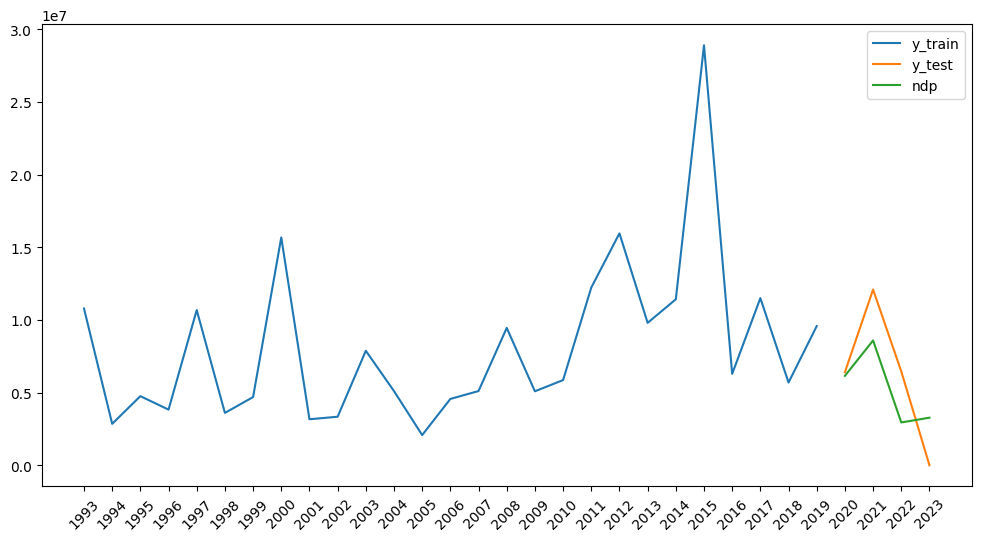

In [45]:
plt.figure(figsize = (12, 6))
plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_test.index, n3_preds, label = party)
plt.xticks(range(1993, 2024), rotation = 45)
plt.legend();

## Bloc Québécois(B3)

In [46]:
party = 'bloc_québécois'
model_name = 'B3'

#Train test Split 
X_train, y_train, X_test, y_test = get_tts(data = contributions, 
        election_years = election_years, 
       party = party,
       train_end = 2018, 
       test_end = 2023,
       lags = 0)

In [47]:

model_res = pd.concat([model_res, 
                       arima_results(X_train, y_train, X_test, y_test, 
                                     party = party, 
                                     fh = [1,2,3,4], 
                                     model_name = model_name)]
                                    )
b3_preds = extract_preds(model_res, model_name)
model_res.drop(columns = 'preds')

C:\Users\wtlem\anaconda3\envs\sktime_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\wtlem\anaconda3\envs\sktime_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\wtlem\anaconda3\envs\sktime_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\wtlem\anaconda3\envs\sktime_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: Va

,model_name,model,party,scaler,rmse,mae
0,L1,lr,liberal,None,5941013.0,3911651.0
0,L2,lr,liberal,log,6547936.0,4090028.0
0,C1,lr,conservative,None,24354536.0,21323675.0
0,C2,lr,conservative,log,29611724.0,24809677.0
0,N1,lr,ndp,None,2885209.0,1795680.0
0,N2,lr,ndp,log,3045706.0,1921515.0
0,B1,lr,bloc_québécois,None,969905.0,894225.0
0,B2,lr,bloc_québécois,log,641509.0,550668.0
0,L3,lr,liberal,NaN,8159013.0,5840371.0
0,C3,lr,conservative,NaN,24061564.0,21166809.0


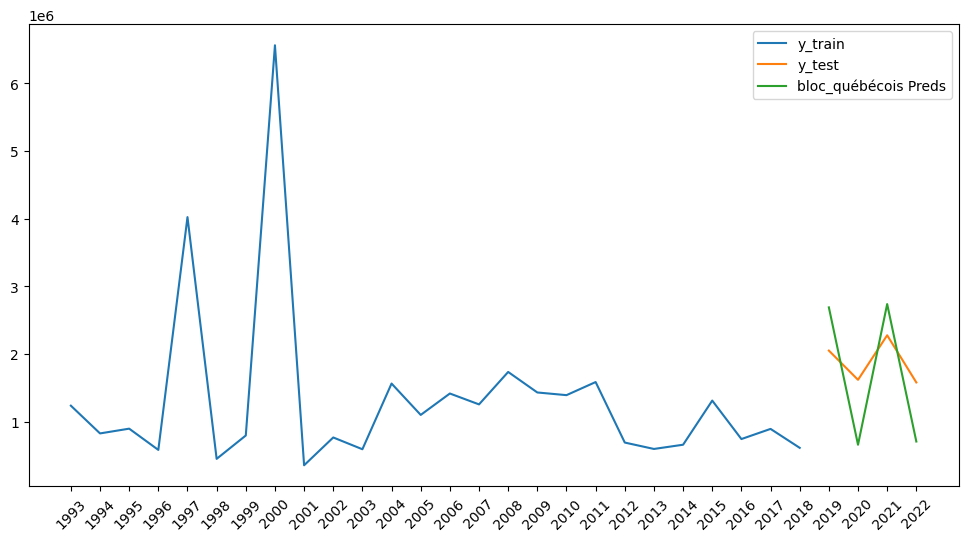

In [48]:
plt.figure(figsize = (12, 6))
plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_test.index, b3_preds, label = f'{party} Preds')
plt.xticks(range(1993, 2023), rotation = 45)
plt.legend();

# Compare Models to Baseline

In [49]:
#create dictionary with rmse and mae values
metrics = {
    'liberal': {'rmse': liberal_base_rmse, 'mae': liberal_base_mae, 'mean': liberal_mean},
    'conservative': {'rmse': conservative_base_rmse, 'mae': conservative_base_mae, 'mean': conservative_mean},
    'ndp': {'rmse': ndp_base_rmse, 'mae': ndp_base_mae, 'mean': ndp_mean},
    'bloc_québécois': {'rmse': bloc_québécois_base_rmse, 'mae': bloc_québécois_base_mae, 'mean': bloc_québécois_mean},
}

# create empty columns
#subtract base rmse by model rmse to get difference
model_res['rmse_diff_base'] = None
#subtract base mae by model mae to get difference
model_res['mae_diff_base'] = None
#add the overall mean of the contributions data for comparison to rmse
model_res['contribution_mean'] = None
model_res['base_rmse'] = None

# fill columns using a for loop
for p, m in metrics.items():
    model_res.loc[model_res['party'] == p, 'rmse_diff_base'] = m['rmse'] - model_res['rmse'].loc[model_res['party'] == p]
    model_res.loc[model_res['party'] == p, 'mae_diff_base'] = m['mae'] - model_res['mae'].loc[model_res['party'] == p]
    model_res.loc[model_res['party'] == p, 'contribution_mean'] = m['mean']
    model_res.loc[model_res['party'] == p, 'base_rmse'] = m['rmse']
    
    

In [50]:
model_res

,model_name,model,party,scaler,rmse,mae,preds,rmse_diff_base,mae_diff_base,contribution_mean,base_rmse
0,L1,lr,liberal,None,5941013.0,3911651.0,"[14496039.580529226, 27999067.081884578, 15895...",4330722.0,4067781.0,18481505.0,10271735.0
0,L2,lr,liberal,log,6547936.0,4090028.0,"[15302815.075014373, 28121952.86606087, 160306...",3723799.0,3889404.0,18481505.0,10271735.0
0,C1,lr,conservative,None,24354536.0,21323675.0,"[31029354.392986845, 40849551.00078088, 345237...",3303584.0,4832990.0,24270209.0,27658120.0
0,C2,lr,conservative,log,29611724.0,24809677.0,"[13259107.05424749, 37412607.20630064, 2008889...",-1953604.0,1346988.0,24270209.0,27658120.0
0,N1,lr,ndp,None,2885209.0,1795680.0,"[6744583.478934032, 12599215.173145184, 710041...",1997808.0,2305921.0,8246623.0,4883017.0
0,N2,lr,ndp,log,3045706.0,1921515.0,"[7088653.009424885, 11756403.312375361, 712750...",1837311.0,2180086.0,8246623.0,4883017.0
0,B1,lr,bloc_québécois,None,969905.0,894225.0,"[623163.6395440372, 1881677.7508201094, 280581...",-451260.0,-485966.0,1461547.0,518645.0
0,B2,lr,bloc_québécois,log,641509.0,550668.0,"[728837.3053387174, 2170444.0774801257, 916812...",-122864.0,-142409.0,1461547.0,518645.0
0,L3,lr,liberal,NaN,8159013.0,5840371.0,2020 1.315355e+07 2021 2.873161e+07 2022...,2112722.0,2139061.0,18481505.0,10271735.0
0,C3,lr,conservative,NaN,24061564.0,21166809.0,2020 3.600587e+07 2021 4.600764e+07 2022...,3596556.0,4989856.0,24270209.0,27658120.0


In [51]:
model_res[['model_name','rmse','rmse_diff_base', 'mae', 'mae_diff_base', 'contribution_mean']]

,model_name,rmse,rmse_diff_base,mae,mae_diff_base,contribution_mean
0,L1,5941013.0,4330722.0,3911651.0,4067781.0,18481505.0
0,L2,6547936.0,3723799.0,4090028.0,3889404.0,18481505.0
0,C1,24354536.0,3303584.0,21323675.0,4832990.0,24270209.0
0,C2,29611724.0,-1953604.0,24809677.0,1346988.0,24270209.0
0,N1,2885209.0,1997808.0,1795680.0,2305921.0,8246623.0
0,N2,3045706.0,1837311.0,1921515.0,2180086.0,8246623.0
0,B1,969905.0,-451260.0,894225.0,-485966.0,1461547.0
0,B2,641509.0,-122864.0,550668.0,-142409.0,1461547.0
0,L3,8159013.0,2112722.0,5840371.0,2139061.0,18481505.0
0,C3,24061564.0,3596556.0,21166809.0,4989856.0,24270209.0


## Model Compare Interpretation

Almost linear models have shown significant improvement over the baseline models, and all Arima models have been shown to be worse than the baseline. The Bloc Québécois is the only party to see no improvement across all models. 

# Plots for presentation

In [52]:
best_models = model_res.loc[\
(model_res['model_name'] == 'L1') | \
(model_res['model_name'] == 'C1') |\
(model_res['model_name'] == 'N1') | \
(model_res['model_name'] == 'B2')]
best_models.drop(columns = ['preds', 'scaler', 'party'])

,model_name,model,rmse,mae,rmse_diff_base,mae_diff_base,contribution_mean,base_rmse
0,L1,lr,5941013.0,3911651.0,4330722.0,4067781.0,18481505.0,10271735.0
0,C1,lr,24354536.0,21323675.0,3303584.0,4832990.0,24270209.0,27658120.0
0,N1,lr,2885209.0,1795680.0,1997808.0,2305921.0,8246623.0,4883017.0
0,B2,lr,641509.0,550668.0,-122864.0,-142409.0,1461547.0,518645.0


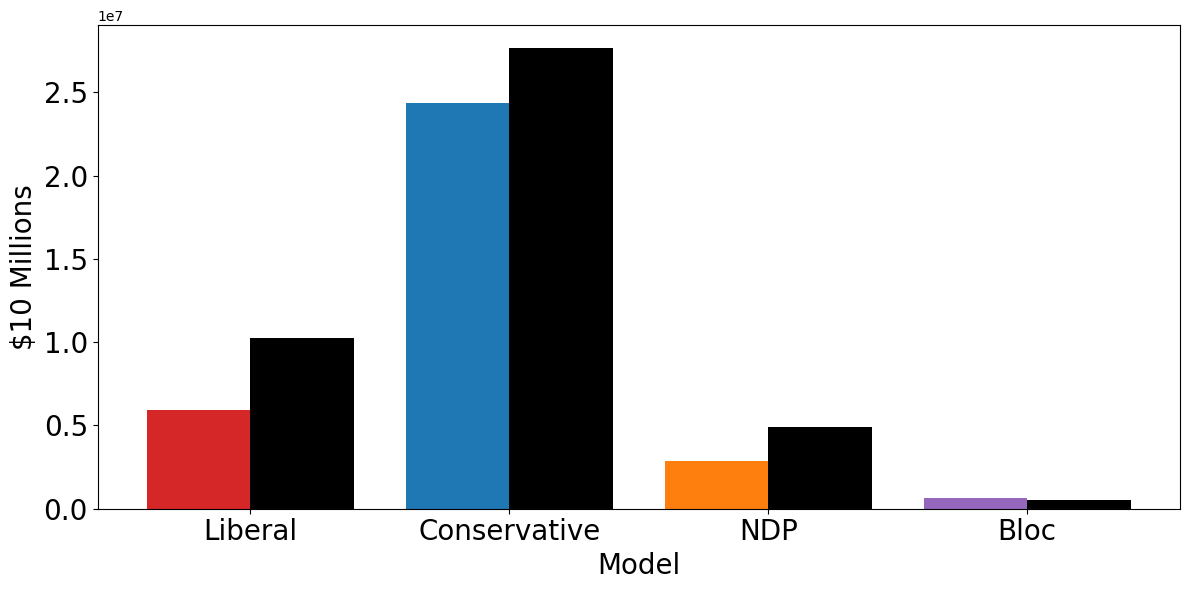

In [53]:
#plot created with the help of ChatGpt
# Define colors for the 'rmse' bars
rmse_colors = ['tab:red', 'tab:blue', 'tab:orange', 'tab:purple']
party_labels = ['Liberal', 'Conservative', 'NDP', 'Bloc']

plt.figure(figsize = (12,6))
# Create the bar plot
x = np.arange(len(best_models))  # X positions for bars
bar_width = 0.4  # Width of bars

# Plot 'rmse' bars with individual colors
plt.bar(x - bar_width / 2, best_models['rmse'], width=bar_width, color=rmse_colors, label='RMSE')

# Plot 'base_rmse' bars in black
plt.bar(x + bar_width / 2, best_models['base_rmse'], width=bar_width, color='black', label='Base RMSE')

# Add labels and title

plt.xlabel('Model', fontsize = 20)
plt.ylabel('$10 Millions', fontsize =20)
plt.xticks(x, party_labels, fontsize = 20)  # Set x-axis labels to model names
plt.yticks(fontsize = 20)
# Show the plot
plt.tight_layout()

plt.savefig('./visuals/comparing_best_rmse.png')
plt.show()

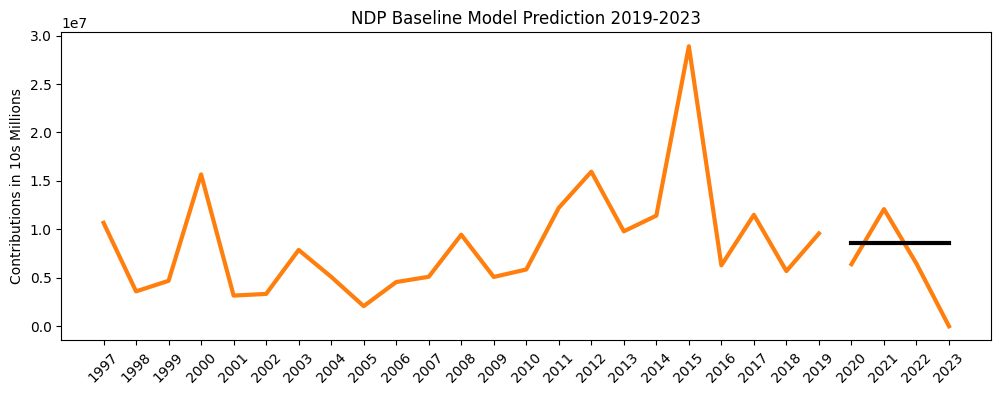

In [55]:
party = 'ndp'

#get train test split for 4 years
X_train, y_train, X_test, y_test = get_tts(data = contributions, 
        election_years = election_years, 
       party = party,
       train_end = 2019, 
       test_end = 2023,
       lags = 5)

#instantiate naive forecaster, fit and get predictions
ndp_base_model = NaiveForecaster(strategy = 'mean')
ndp_base_model.fit(y_train)
ndp_base_preds = ndp_base_model.predict(y_test.index)

#plot baseline forecast
plt.figure(figsize = (12, 4))
plt.plot(y_train, label = 'Train', color = 'tab:orange', linewidth = 3)
plt.plot(y_test, label = 'Test', color = 'tab:orange', linewidth = 3)
plt.plot(y_test.index, ndp_base_preds, color = 'k', linewidth =3)
plt.title('NDP Baseline Model Prediction 2019-2023')
plt.ylabel('Contributions in 10''s Millions')
plt.xticks(range(1997, 2024), rotation = 45)
plt.savefig('./visuals/ndp_baseline.png');

''

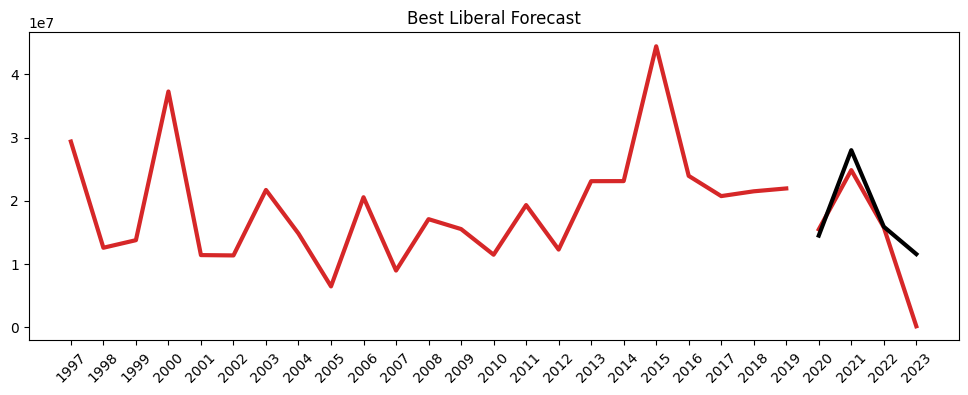

In [56]:
X_train, y_train, X_test, y_test = get_tts(data = contributions, 
        election_years = election_years, 
       party = 'liberal',
       train_end = 2019, 
       test_end = 2023,
       lags = 5)

model_res = pd.concat([model_res, 
                       lr_results(X_train, y_train, X_test, y_test,
                                  input_df = model_res,
                                  party = 'liberal',
                                 model_name = 'L1')]
                                    )
#get predictions 
l1_preds = extract_preds(model_res, 'L1')

model_res.drop(columns = 'preds')

plt.figure(figsize = (12, 4))
plt.title('Best Liberal Forecast')
plt.plot(y_train, label = 'y_train', color = 'tab:red', linewidth=3)
plt.plot(y_test, label = 'y_test', color = 'tab:red', linewidth=3)
plt.plot(y_test.index, l1_preds, label = 'liberal_preds', color = 'k', linewidth=3)
plt.xticks(range(1997, 2024), rotation = 45)
plt.savefig('./visuals/best_liberal_forcast.png')
;

''

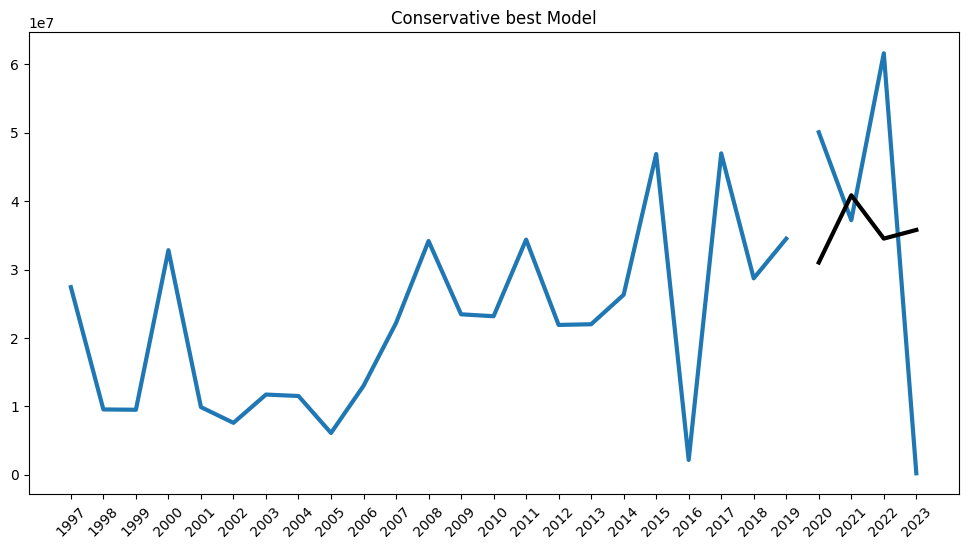

In [57]:
X_train, y_train, X_test, y_test = get_tts(data = contributions, 
        election_years = election_years, 
       party = 'conservative',
       train_end = 2019, 
       test_end = 2023,
       lags = 5)

model_res = pd.concat([model_res, 
                       lr_results(X_train, y_train, X_test, y_test, 
                                  input_df = model_res, 
                                  party = 'conservative',
                                 model_name = 'C1')]
                                    )
c1_preds = extract_preds(model_res, 'C1')
model_res.drop(columns = 'preds')

plt.figure(figsize = (12, 6))
plt.title('Conservative best Model')
plt.plot(y_train, label = 'y_train', color = 'tab:blue', linewidth=3)
plt.plot(y_test, label = 'y_test', color = 'tab:blue', linewidth=3)
plt.plot(y_test.index, c1_preds, label = 'conservative_preds', color = 'k', linewidth=3)
plt.xticks(range(1997, 2024), rotation = 45)
plt.savefig('./visuals/best_conservative_forecast.png')
;